In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

df = pd.read_csv('indexData.csv')
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [53]:
dfn = df[df['Index'] == 'NYA'].dropna()

In [54]:
dfn

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [55]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13947 entries, 0 to 13947
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      13947 non-null  object 
 1   Date       13947 non-null  object 
 2   Open       13947 non-null  float64
 3   High       13947 non-null  float64
 4   Low        13947 non-null  float64
 5   Close      13947 non-null  float64
 6   Adj Close  13947 non-null  float64
 7   Volume     13947 non-null  float64
dtypes: float64(6), object(2)
memory usage: 980.6+ KB


In [56]:
df_data = dfn.copy()

In [57]:
df_data['Date'] = pd.to_datetime(df_data['Date'])

In [58]:
df_data['day_difference'] = df_data['Date'].diff().dt.days

In [59]:
df_data['day_difference'].value_counts()

day_difference
1.0    10889
3.0     2556
4.0      332
2.0      165
5.0        3
7.0        1
Name: count, dtype: int64

In [60]:
df_data = dfn.copy()

In [61]:
df_data['Date'] = pd.to_datetime(df_data['Date'])

In [62]:
df_data['day_difference'] = df_data['Date'].diff().dt.days

In [63]:
df_data['day_difference'].value_counts()

day_difference
1.0    10889
3.0     2556
4.0      332
2.0      165
5.0        3
7.0        1
Name: count, dtype: int64

In [64]:
df_data['Adj Close'].values.reshape(-1, 1)

array([[  528.690002],
       [  527.210022],
       [  527.840027],
       ...,
       [16451.96094 ],
       [16531.94922 ],
       [16555.66016 ]])

In [65]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_data['Adj Close'].values.reshape(-1, 1))

In [66]:
scaled_data

array([[-0.96274432],
       [-0.96310748],
       [-0.96295289],
       ...,
       [ 2.94450646],
       [ 2.96413398],
       [ 2.96995217]])

In [67]:
window_size = 3

In [68]:
X, y, y_gen = [], [], []

for i in range(window_size, len(scaled_data)):
  X.append(scaled_data[i-window_size:i, 0])
  y.append(scaled_data[i, 0])
  y_gen.append(scaled_data[i - window_size: i + 1, 0])

In [69]:
X, y, y_gen = np.array(X), np.array(y), np.array(y_gen)
print(X[0])
print(y[0])
print(y_gen[0])

[-0.96274432 -0.96310748 -0.96295289]
-0.9621480527978078
[-0.96274432 -0.96310748 -0.96295289 -0.96214805]


In [70]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
y_gen = np.reshape(y_gen, (y_gen.shape[0], y_gen.shape[1], 1))

In [71]:
X.shape

(13944, 3, 1)

In [72]:
y_gen.shape

(13944, 4, 1)

In [73]:
test_split = 0.2
split_index = int(len(y) * (1-test_split))
train_x = X[:split_index]
# train_y = y[:split_index]
test_x = X[(split_index + window_size - 1):]
test_y = y[(split_index + window_size - 1):]

train_y_gen = y_gen[:split_index]
test_y_gen = y_gen[(split_index + window_size - 1):]

In [74]:
# indices = np.arange(len(train_y))
# np.random.shuffle(indices)
# train_x = train_x[indices]
# # train_y = train_y[indices]
# train_y_gen = train_y_gen[indices]

In [75]:
print(train_x.shape)


(11155, 3, 1)


In [76]:
# parameters
batch_size = 128
learning_rate = 0.0001
num_epochs = 10
input_size_gen = (1, window_size)
input_size_disc = (1, window_size+1)

In [77]:
def create_generator():
    generator = tf.keras.Sequential()
    generator.add(tf.keras.Input(shape=(window_size,1)))
    generator.add(tf.keras.layers.GRU(1024, return_sequences=True))
    generator.add(tf.keras.layers.GRU(512, return_sequences=True))
    generator.add(tf.keras.layers.GRU(256))
    generator.add(tf.keras.layers.Dense(128))
    generator.add(tf.keras.layers.Dense(64))
    generator.add(tf.keras.layers.Dense(1))
    generator.add(tf.keras.layers.Reshape((1,)))
    generator.add(tf.keras.layers.Dropout(0.2))

    return generator

In [78]:
def create_discrimanator():
    discrimator = tf.keras.Sequential()
    discrimator.add(tf.keras.Input(shape=(window_size + 1,1)))
    discrimator.add(tf.keras.layers.Conv1D(32, kernel_size=3, strides=1, padding='same', activation='leaky_relu'))
    discrimator.add(tf.keras.layers.Conv1D(64, kernel_size=3, strides=1, padding='same', activation='leaky_relu'))
    discrimator.add(tf.keras.layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='leaky_relu'))
    discrimator.add(tf.keras.layers.Flatten())
    discrimator.add(tf.keras.layers.Dense(220, activation='leaky_relu'))
    discrimator.add(tf.keras.layers.BatchNormalization())
    discrimator.add(tf.keras.layers.Dense(220, activation='relu'))
    discrimator.add(tf.keras.layers.BatchNormalization())
    discrimator.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    discrimator.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return discrimator

In [79]:
generator = create_generator()
discriminator = create_discrimanator()

In [80]:
train_x[0].shape

(3, 1)

In [81]:
generated_sample = generator(train_x[:1], training=False)
# fake_data = tf.concat([train_x[0], generated_sample], 1)
train_y_gen[:1].shape
discriminator(train_y_gen[:1])
discriminator.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 4, 32)             128       
                                                                 
 conv1d_7 (Conv1D)           (None, 4, 64)             6208      
                                                                 
 conv1d_8 (Conv1D)           (None, 4, 128)            24704     
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 220)               112860    
                                                                 
 batch_normalization_4 (Bat  (None, 220)               880       
 chNormalization)                                                
                                                      

In [82]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [83]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [84]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.0, beta_2=0.9)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.0, beta_2=0.9)

In [85]:
def train_step(x_real, y_real):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        y_fake = generator(x_real)
        # fake_data = tf.concat([train_x[0], y_fake], 1)
        fake_data = tf.concat([y_real[:, :window_size, :], tf.reshape(y_fake, (-1, 1, 1))], axis=1)
        real_output = discriminator(y_real)
        fake_output = discriminator(fake_data)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
        discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

        return gen_loss, disc_loss

In [86]:
def train(epochs=50):
    num_batches = len(train_x) // batch_size
    gen_loss_epoch = []
    disc_loss_epoch = []
    for epoch in range(epochs):
        for i in range(num_batches):
            #for x, y_gen in zip(train_x, train_y_gen):
            start_idx = i * batch_size
            end_idx = start_idx + batch_size
            x_batch = train_x[start_idx:end_idx]
            y_gen_batch = train_y_gen[start_idx:end_idx]
            gen_loss, disc_loss = train_step(x_batch, y_gen_batch)
            # print("gen_loss ", gen_loss.numpy())
            # print("disc_loss ", disc_loss.numpy())
        gen_loss_epoch.append(gen_loss.numpy())
        disc_loss_epoch.append(disc_loss.numpy())

        print(f'[{epoch+1}/{epochs}] LossD: {np.mean(disc_loss_epoch)} LossG:{np.mean(gen_loss_epoch)}')

    return gen_loss_epoch, disc_loss_epoch

In [87]:
gen_loss_epoch, disc_loss_epoch = train()

/home/rol3ert99/.local/lib/python3.10/site-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


[1/50] LossD: 1.3863427639007568 LossG:0.6906265020370483
[2/50] LossD: 1.386022925376892 LossG:0.6900783777236938
[3/50] LossD: 1.386130690574646 LossG:0.691241979598999
[4/50] LossD: 1.3861900568008423 LossG:0.6921546459197998
[5/50] LossD: 1.3861743211746216 LossG:0.6936119198799133
[6/50] LossD: 1.3862156867980957 LossG:0.6940369606018066
[7/50] LossD: 1.386267066001892 LossG:0.6935263276100159
[8/50] LossD: 1.3861219882965088 LossG:0.6938591003417969
[9/50] LossD: 1.3862117528915405 LossG:0.6952290534973145
[10/50] LossD: 1.3862810134887695 LossG:0.6959149837493896
[11/50] LossD: 1.3862301111221313 LossG:0.6957384347915649
[12/50] LossD: 1.3861006498336792 LossG:0.6956084370613098
[13/50] LossD: 1.3861501216888428 LossG:0.6954797506332397
[14/50] LossD: 1.386179804801941 LossG:0.695462703704834
[15/50] LossD: 1.3861966133117676 LossG:0.6956930160522461
[16/50] LossD: 1.3861957788467407 LossG:0.6955850124359131
[17/50] LossD: 1.3861840963363647 LossG:0.6958873867988586
[18/50] Loss

In [88]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')

/home/rol3ert99/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


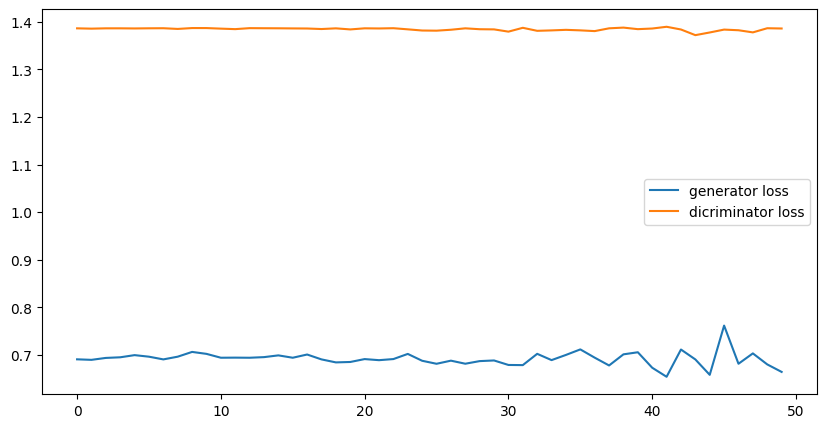

In [89]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
plt.plot(gen_loss_epoch, label='generator loss')
plt.plot(disc_loss_epoch, label='dicriminator loss')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


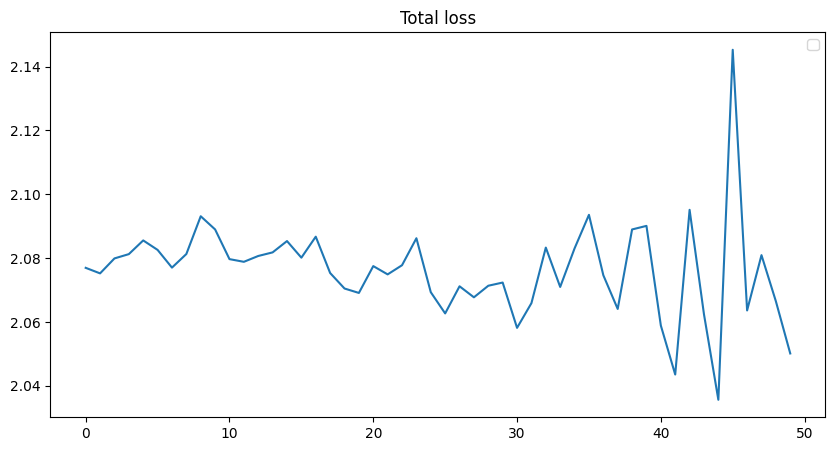

In [90]:
plt.figure(figsize=(10,5))
sum = [g + d for g, d in zip(gen_loss_epoch, disc_loss_epoch)]
plt.plot(sum)
plt.title("Total loss")
plt.legend()
plt.show()

In [91]:
def evaluate(test_x, test_y):
    pred_y = generator(test_x)
    mse = tf.keras.losses.MeanSquaredError()
    evaluation_metrics = mse(test_y, pred_y).numpy()
    return evaluation_metrics

In [92]:
print(evaluate(test_x, test_y))

0.59783286


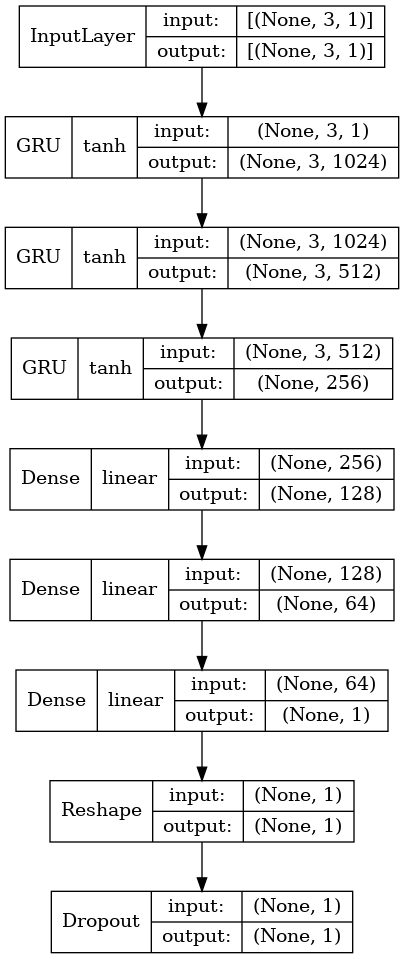

In [93]:
tf.keras.utils.plot_model(generator, show_layer_names=False, show_shapes=True,
                          show_layer_activations=True, to_file = 'generator.png')

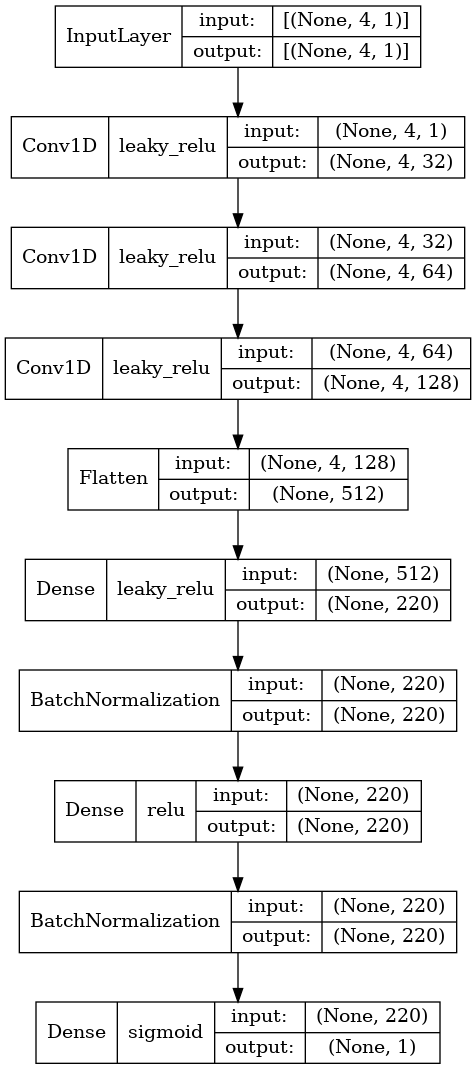

In [94]:
tf.keras.utils.plot_model(discriminator, show_layer_names=False, show_shapes=True,
                          show_layer_activations=True, to_file = 'discriminator.png')